# Final Project

## Blake Conrad

## TSP Subtour Elimination Via Cutting Planes

In [6]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\blakeconrad\Desktop\imse884\term_project")
df = pd.read_csv("Nfldata.csv")
df = df.iloc[:,1:]
print(df.shape)
df

(32, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,1270,396,189,739,480,364,554,805,1023,...,628,865,728,1170,921,1356,2489,1034,2295,2695
1,1270,0,1201,1104,972,1024,960,1094,1028,329,...,1157,1375,657,207,617,654,2732,1068,1974,2583
2,396,1201,0,294,395,183,287,185,440,893,...,237,475,553,1046,690,1093,2114,664,1907,2299
3,189,1104,294,0,571,315,176,409,644,843,...,496,763,540,992,732,1167,2407,873,2141,2569
4,739,972,395,571,0,259,428,211,88,643,...,215,407,349,782,369,715,1961,304,1574,2033
5,480,1024,183,315,259,0,200,115,329,712,...,213,499,372,865,509,921,2136,558,1826,2262
6,364,960,287,176,428,200,0,314,509,680,...,411,696,366,832,557,992,2336,731,2001,2454
7,554,1094,185,409,211,115,314,0,257,772,...,98,384,437,922,536,919,2022,484,1741,2160
8,805,1028,440,644,88,329,509,257,0,700,...,225,347,427,833,415,713,1874,230,1498,1948
9,1023,329,893,843,643,712,680,772,700,0,...,831,1046,340,154,293,493,2456,757,1791,2368


# Solve TSP

## Relaxed, no subtour elimination constraints/cuts

In [14]:
import os
import pyomo.environ as pyo
from pyomo.environ import *

from pyomo.opt import SolverFactory

opt = pyo.SolverFactory('glpk')

model = ConcreteModel()

#
# TSP DV
#
#Xij if we travel from i to j
#
model.X = Var(range(df.shape[0]), range(df.shape[1]), within=Binary, initialize=0)


#
# TSP Objective
#
# Min dij*xij
#
model.obj = Objective(expr = sum([model.X[i,j]*df.iloc[i,j] for i in model.X_index_0.data() for j in model.X_index_1.data()]), 
                      sense=minimize)
model.constraints = ConstraintList()

#
# TSP Constraints
#
# sum_j{xij} = 1 for all i
#
for i in model.X_index_0.data():
    model.constraints.add(sum([model.X[i,j] for j in model.X_index_1.data() if i != j]) ==1)

# sum_i{xij} = 1 for all j
#
for j in model.X_index_1.data():
    model.constraints.add(sum([model.X[i,j] for i in model.X_index_0.data() if i != j]) ==1)



# Solution

In [15]:
# Create a model instance and optimize
instance = model.create_instance()
results = opt.solve(instance, tee=True)
instance.display()


    model; returning a clone of the current model instance.
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\BLAKEC~1\AppData\Local\Temp\tmp7gecn7iy.glpk.raw --wglp
 C:\Users\BLAKEC~1\AppData\Local\Temp\tmp4loxb00g.glpk.glp --cpxlp C:\Users\BLAKEC~1\AppData\Local\Temp\tmpzpw7ouak.pyomo.lp
Reading problem data from 'C:\Users\BLAKEC~1\AppData\Local\Temp\tmpzpw7ouak.pyomo.lp'...
C:\Users\BLAKEC~1\AppData\Local\Temp\tmpzpw7ouak.pyomo.lp:4171: warning: lower bound of variable 'x2' redefined
C:\Users\BLAKEC~1\AppData\Local\Temp\tmpzpw7ouak.pyomo.lp:4171: warning: upper bound of variable 'x2' redefined
65 rows, 993 columns, 1985 non-zeros
992 integer variables, all of which are binary
5163 lines were read
Writing problem data to 'C:\Users\BLAKEC~1\AppData\Local\Temp\tmp4loxb00g.glpk.glp'...
4102 lines were written
GLPK Integer Optimizer, v4.65
65 rows, 993 columns, 1985 non-zeros
992 integer variables, all of which are binary
Preprocessing...
64 

In [16]:
instance.X.get_values()

{(0, 0): 0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 0.0,
 (0, 5): 0.0,
 (0, 6): 0.0,
 (0, 7): 0.0,
 (0, 8): 0.0,
 (0, 9): 0.0,
 (0, 10): 0.0,
 (0, 11): 0.0,
 (0, 12): 0.0,
 (0, 13): 0.0,
 (0, 14): 0.0,
 (0, 15): 0.0,
 (0, 16): 0.0,
 (0, 17): 0.0,
 (0, 18): 0.0,
 (0, 19): 1.0,
 (0, 20): 0.0,
 (0, 21): 0.0,
 (0, 22): 0.0,
 (0, 23): 0.0,
 (0, 24): 0.0,
 (0, 25): 0.0,
 (0, 26): 0.0,
 (0, 27): 0.0,
 (0, 28): 0.0,
 (0, 29): 0.0,
 (0, 30): 0.0,
 (0, 31): 0.0,
 (1, 0): 0.0,
 (1, 1): 0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (1, 4): 0.0,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.0,
 (1, 8): 0.0,
 (1, 9): 1.0,
 (1, 10): 0.0,
 (1, 11): 0.0,
 (1, 12): 0.0,
 (1, 13): 0.0,
 (1, 14): 0.0,
 (1, 15): 0.0,
 (1, 16): 0.0,
 (1, 17): 0.0,
 (1, 18): 0.0,
 (1, 19): 0.0,
 (1, 20): 0.0,
 (1, 21): 0.0,
 (1, 22): 0.0,
 (1, 23): 0.0,
 (1, 24): 0.0,
 (1, 25): 0.0,
 (1, 26): 0.0,
 (1, 27): 0.0,
 (1, 28): 0.0,
 (1, 29): 0.0,
 (1, 30): 0.0,
 (1, 31): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0,
 (2, 3): 0.0,
 (2, 4): 0

In [45]:
results={}
D = np.zeros((32,32), dtype=int)
for k,v in instance.X.get_values().items():
    if v == 1:
        results[k]=v
        D[k[0],k[1]]=1
        #print(k,v)
        
print(D)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Clearly we have some subtours

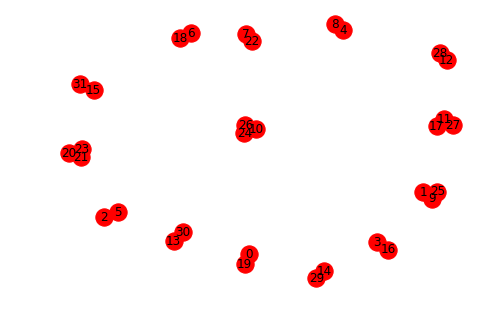

In [69]:
G = nx.from_numpy_matrix(D) 
nx.draw(G, with_labels=True)